# Demo

In [1]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Input, Embedding
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Getting raw input names

In [2]:
with open('cleaned_inputs.txt', 'r') as f:
    raw_text = f.read()
    raw_inputs = raw_text.split('\n')

# Creating dictionary of characters

In [3]:
char2id = dict((c,i) for (i, c) in enumerate(sorted(set(raw_text.replace('\n', ' '))),1))
id2char = dict(enumerate(sorted(set(raw_text.replace('\n', ' '))),1))
char2id['<PAD>'] = 0
id2char[0] = '<PAD>'

print(char2id)

{' ': 1, "'": 2, '-': 3, '.': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9, 'F': 10, 'G': 11, 'H': 12, 'I': 13, 'J': 14, 'K': 15, 'L': 16, 'M': 17, 'N': 18, 'O': 19, 'P': 20, 'Q': 21, 'R': 22, 'S': 23, 'T': 24, 'U': 25, 'V': 26, 'W': 27, 'X': 28, 'Y': 29, 'Z': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, '<PAD>': 0}


In [4]:
raw_inputs[:5]

['Aleksandr Yuryevich Ektov',
 'Daniel Horton',
 'Tony Lovato',
 'John William Gurry',
 'Petrus Wilhelmus Arntz']

# Preprocessing inputs for the model

In [5]:
inputs = [[char2id[char] for char in name] for name in raw_inputs]
inputs = pad_sequences(inputs, maxlen=40, padding='post')
inputs[:5]

array([[ 5, 42, 35, 41, 49, 31, 44, 34, 48,  1, 29, 51, 48, 55, 35, 52,
        39, 33, 38,  1,  9, 41, 50, 45, 52,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 8, 31, 44, 39, 35, 42,  1, 12, 45, 48, 50, 45, 44,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [24, 45, 44, 55,  1, 16, 45, 52, 31, 50, 45,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [14, 45, 38, 44,  1, 27, 39, 42, 42, 39, 31, 43,  1, 11, 51, 48,
        48, 55,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [20, 35, 50, 48, 51, 49,  1, 27, 39, 42, 38, 35, 42, 43, 51, 49,
         1,  5, 48, 44, 50, 56,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

# Preprocessing labels

In [6]:
with open('labels.txt', 'r') as f:
    raw_labels = f.read().split('\n')

In [7]:
raw_labels[:5]

['1.0', '1.0', '1.0', '1.0', '1.0']

In [8]:
labels = to_categorical(np.float32(raw_labels))
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Splitting the data into Training and Testing sets 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# LSTM Model

In [10]:
input_layer = Input((None,))
x = Embedding(len(char2id), 32)(input_layer)
x = LSTM(256)(x)
x = Dense(512)(x)
x = Dense(2, activation='softmax')(x)

model = Model(input_layer, x)

In [11]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=5, validation_split=0.2)

Train on 1154352 samples, validate on 288589 samples
Epoch 1/5
1154352/1154352 [==============================] - 186s 161us/step - loss: 0.4324 - acc: 0.7920 - val_loss: 0.3707 - val_acc: 0.8294
Epoch 2/5
1154352/1154352 [==============================] - 184s 160us/step - loss: 0.3351 - acc: 0.8501 - val_loss: 0.3064 - val_acc: 0.8652
Epoch 3/5
1154352/1154352 [==============================] - 185s 160us/step - loss: 0.2804 - acc: 0.8809 - val_loss: 0.2541 - val_acc: 0.8941
Epoch 4/5
1154352/1154352 [==============================] - 185s 160us/step - loss: 0.2305 - acc: 0.9061 - val_loss: 0.2107 - val_acc: 0.9161
Epoch 5/5
1154352/1154352 [==============================] - 184s 160us/step - loss: 0.1960 - acc: 0.9232 - val_loss: 0.1808 - val_acc: 0.9303


# Plot Accuracy and Loss curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


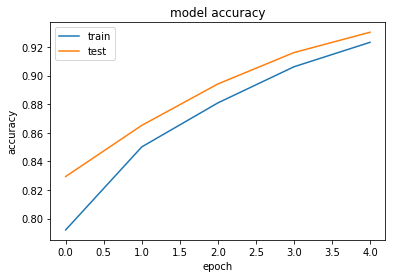

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

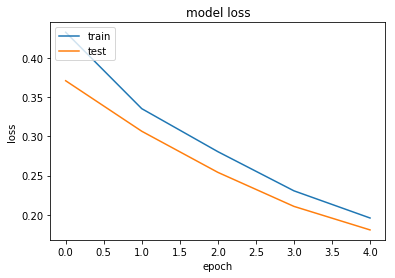

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluating the model on the testing set 

In [17]:
loss, acc = model.evaluate(X_test, y_test, batch_size=1024)
print('accuracy: ',acc)
print('loss: ',loss)

360736/360736 [==============================] - 16s 45us/step
accuracy:  0.9300125299176423
loss:  0.18162886663950145


In [22]:
label_dict = ['Non person name', 'Person Name']

In [30]:
test_string = 'Ricardo Diaz'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Ricardo Diaz is a Person Name


In [29]:
test_string = 'Thiago Galery'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Thiago Galery is a Person Name


In [31]:
test_string = 'Jean Claude von Muchausen Gordon-Smith'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Jean Claude von Muchausen Gordon-Smith is a Person Name


In [32]:
test_string = 'Kahfsgjgfjsdgjhfgdjs'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Kahfsgjgfjsdgjhfgdjs is a Non person name


In [33]:
test_string = 'Book'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Book is a Non person name


# Saving the model

In [24]:
model.save('model-v1.h5')